efetua os imports das dependencias

In [0]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

importa os dados do arquivo excel referente ao civil e adiciona a coluna CLASSE com o valor 0, representando o tipo de dado civil

In [0]:
uri_data_civel = 'https://github.com/julianopacheco/classificacao-textos-juridicos/blob/master/arquivos/xls/civel.xlsx?raw=true'
dados_civil = pd.read_excel(uri_data_civel)
dados_civil["CLASSE"] = 0

importa os dados do arquivo excel referente ao crime e adiciona a coluna CLASSE com o valor 1, representando o tipo de dado crime

In [0]:
uri_data_crime = 'https://github.com/julianopacheco/classificacao-textos-juridicos/blob/master/arquivos/xls/crime.xlsx?raw=true'
dados_crime = pd.read_excel(uri_data_crime)
dados_crime["CLASSE"] = 1

concatena as duas fontes de dados e gera uma nova contendo as duas

In [0]:
dados_civil_e_crime = pd.concat([dados_civil, dados_crime], axis=0)

como agora a fonte de dados contem as duas listas e necessário embaralhar elas para que o civil e crime nao venha na ordem que foram concatenados

isso e feito com o shuffle

In [0]:
dados_civil_e_crime = shuffle(dados_civil_e_crime)
dados_civil_e_crime.head()

,PROCESSO,EMENTA,DATA,CLASSE
3344,70075672055,APELAÇÃO. CRIME CONTRA O PATRIMÔNIO. FURTO QUA...,13/12/17,1
5331,70078096237,APELAÇÃO CÍVEL. NEGÓCIOS JURÍDICOS BANCÁRIOS. ...,19/09/18,0
5973,70075945923,APELAÇÃO CÍVEL. EMBARGOS À ARREMATAÇÃO. NULIDA...,25/10/18,0
3149,70075362038,APELAÇÃO CRIMINAL. CRIME CONTRA O PATRIMÔNIO. ...,29/11/17,1
3411,70073492670,"HABEAS CORPUS. DELITOS DE FURTO ABIGEATO, RECE...",14/12/17,1


verifica a proporcionalidade de cada um dos tipos (civil = 0, crime = 1)

In [0]:
dados_civil_e_crime.CLASSE.value_counts()

1    6000
0    6000
Name: CLASSE, dtype: int64

extrai as ementas dos dados

In [0]:
ementas = dados_civil_e_crime["EMENTA"]


efetua o join das frases e junta todas as palavras de todas as frases n variavel all_words, escreve o total e monta a nuvem de palavras que será desenhada no próximo bloco de código

In [0]:
def gera_nuvem_palavras(text):
  all_words = ' '.join(text)
  word_cloud = WordCloud(width=1200, height=800).generate(all_words)
  print(f'total de palavras {len(all_words)}')
  return word_cloud

desenha a nuvem de palavras dando maior destaque para as palavras com maior frequencia

In [0]:
def desenha_palavras(word_cloud):
  plt.figure(figsize=(10,10))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

total de palavras 16294706


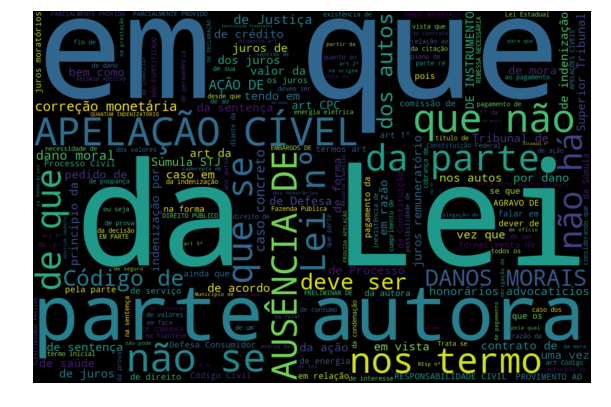

In [0]:
nuvem_palavras_civil = gera_nuvem_palavras(dados_civil.EMENTA)
desenha_palavras(nuvem_palavras_civil)

total de palavras 18277338


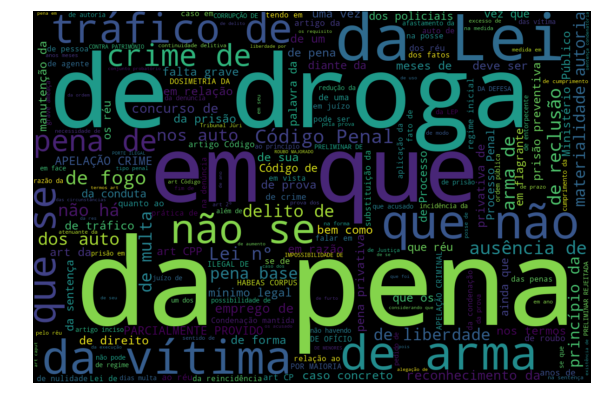

In [0]:
nuvem_palavras_crime = gera_nuvem_palavras(dados_crime.EMENTA)
desenha_palavras(nuvem_palavras_crime)

total de palavras 34572045


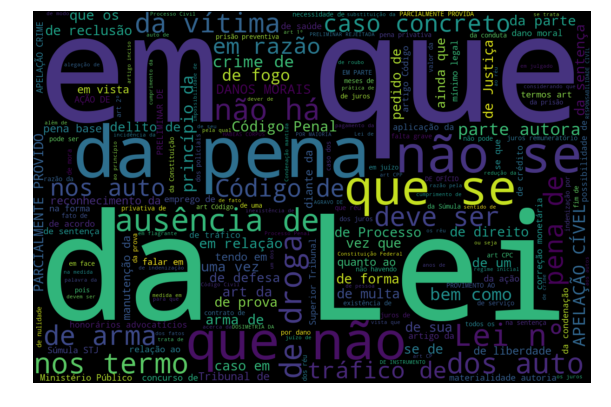

In [0]:
nuvem_palavras_civil_crime = gera_nuvem_palavras(dados_civil_e_crime.EMENTA)
desenha_palavras(nuvem_palavras_civil_crime)